In [24]:
import json
import glob
import datetime
import os

import matplotlib.pyplot as plt

In [23]:
output_path = "logs"

In [4]:
log_paths = glob.glob("logs\\*.json")

logs = []
for log_path in log_paths:
    with open(log_path) as file:
        logs.append(json.load(file))

In [6]:
logs = sorted(logs, key=lambda log : log["agent_time"])

In [16]:
times = []
sound_intensities = []

for log in logs:
    if "sound_intensity" not in log["sensor_result"]:
        continue

    agent_time = datetime.datetime.fromtimestamp(log["agent_time"])
    hour_time = 0
    hour_time += agent_time.hour
    hour_time += agent_time.minute/60
    hour_time += agent_time.second/60/60
        
    times.append(hour_time)
    sound_intensities.append(log["sensor_result"]["sound_intensity"])

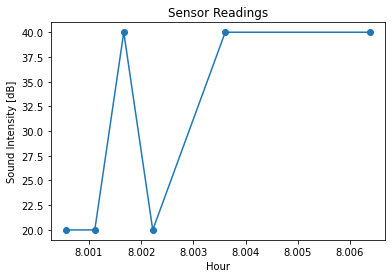

In [25]:
fig = plt.figure()
plt.plot(times, sound_intensities, "o-")

plt.title("Sensor Readings")
plt.xlabel("Hour")
plt.ylabel("Sound Intensity [dB]")

path = os.path.join(output_path, "SensorReadings.png")
fig.savefig(path, facecolor="white", transparent=False)

plt.show()

In [36]:
for log in logs:
    agent_time = datetime.datetime.fromtimestamp(log["agent_time"])
    print(agent_time.strftime("%H:%M:%S"), log["current_place"])
    print()
    print("State:", log["state"])
    print()
    print("Observation:", log["curret_observation"])
    print()
    print("Next action:", log["action"])
    print()
    print("----")

08:00:00 Bedroom

State: 

Observation: 

Next action: Alex wakes up.

----
08:00:02 Bedroom

State: Alex is wide awake

Observation: Alex sees the dresser and nightstand near the bed, and notices the notebook and pens on the desk. He hears the silence of his bedroom. He feels the bed beneath him and the softness of the pillow. He smells the familiar scent of his bedroom. Alex notices the framed nature photographs on the walls, and the plant near the window. He feels his body relaxed and refreshed after a good night's sleep.

Next action: Alex gets out of bed

----
08:00:04 Bedroom

State: Alex is standing

Observation: Alex sees the dresser, nightstand, closet, desk, and lamp in the bedroom, hears silence, and feels a soft rug beneath his feet.

Next action: Alex goes to the dresser

----
08:00:06 Bedroom

State: Alex is in front of the dresser

Observation: Alex sees the dresser in front of him, with the dresser's door slightly open, and notes the neatly organized clothes inside. He 